<a href="https://colab.research.google.com/github/fayaz-ui/python/blob/main/Finance_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#plt.style.use('fivethirtyeight')

In [ ]:
#load the data
from google.colab import files
files.upload()

In [40]:
#store the data
data = pd.read_csv('EURINR=X.csv')
#set the date as the index
data = data.set_index(pd.DatetimeIndex(data['Date'].values))
#show the data
data

,Date,Open,High,Low,Close,Adj Close,Volume
2023-01-02,2023-01-02,87.157700,88.400002,87.157700,88.482002,88.482002,0
2023-01-03,2023-01-03,88.292000,88.313004,87.225998,88.300003,88.300003,0
2023-01-04,2023-01-04,87.219002,87.922997,87.219002,87.219002,87.219002,0
2023-01-05,2023-01-05,87.580002,87.807999,86.757004,87.605003,87.605003,0
2023-01-06,2023-01-06,86.819000,87.614998,86.647003,86.827003,86.827003,0
...,...,...,...,...,...,...,...
2023-10-27,2023-10-27,87.907997,88.163002,87.620003,87.900002,87.900002,0
2023-10-30,2023-10-30,86.858002,88.396004,86.858002,86.858002,86.858002,0
2023-10-31,2023-10-31,88.289001,88.734001,87.921997,88.286003,88.286003,0
2023-11-01,2023-11-01,87.983002,88.021004,87.560997,87.983002,87.983002,0


In [41]:
# Calculate Moving Averages (MA)
data['MA_10'] = data['Close'].rolling(window=10).mean()
data['MA_20'] = data['Close'].rolling(window=20).mean()

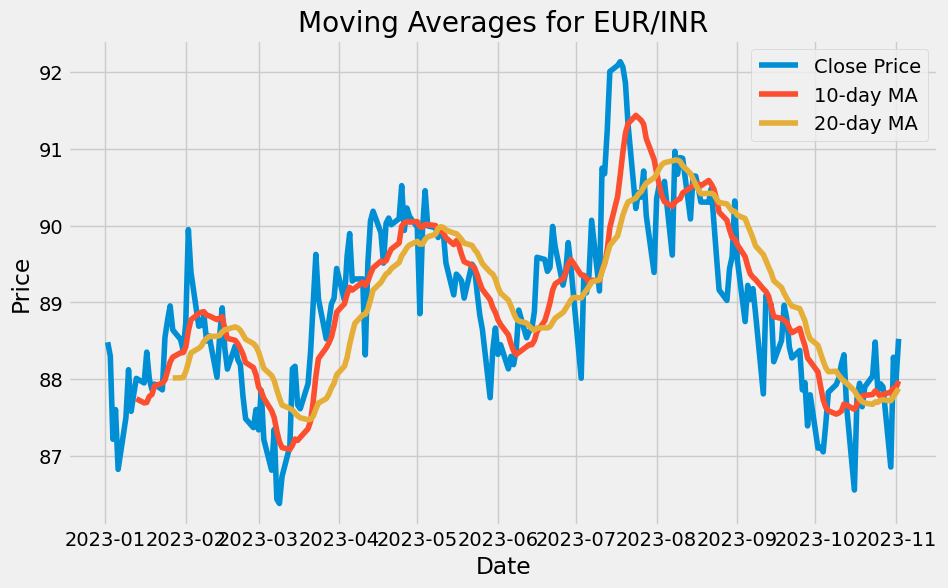

In [45]:
# Plot Moving Averages
plt.figure(figsize=(10, 6))
plt.plot(data['Close'], label='Close Price')
plt.plot(data['MA_10'], label='10-day MA')
plt.plot(data['MA_20'], label='20-day MA')
plt.title('Moving Averages for EUR/INR')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [46]:
# Calculate Bollinger Bands (BB)
data['BB_middle'] = data['Close'].rolling(window=20).mean()
data['BB_std'] = data['Close'].rolling(window=20).std()
data['BB_upper'] = data['BB_middle'] + 2 * data['BB_std']
data['BB_lower'] = data['BB_middle'] - 2 * data['BB_std']

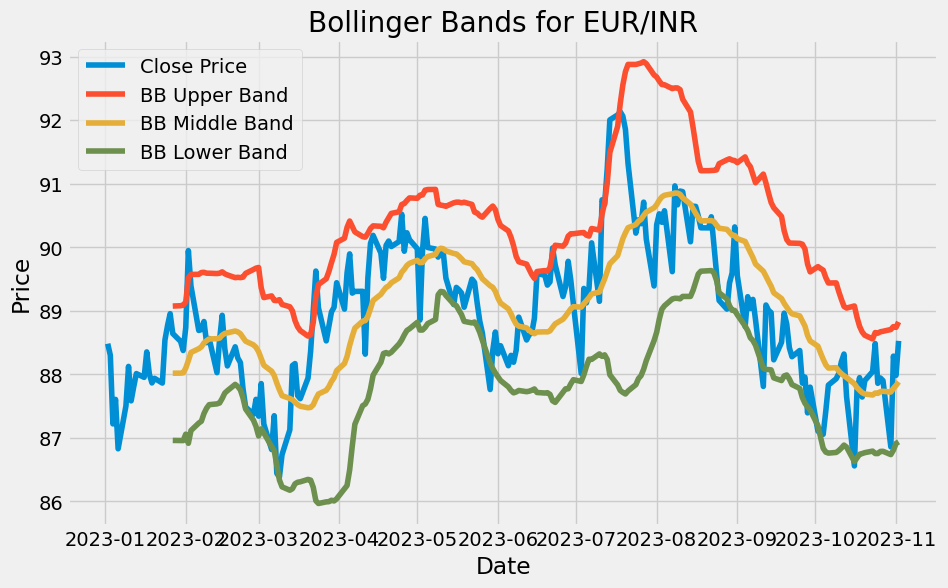

In [47]:
# Plot Bollinger Bands
plt.figure(figsize=(10, 6))
plt.plot(data['Close'], label='Close Price')
plt.plot(data['BB_upper'], label='BB Upper Band')
plt.plot(data['BB_middle'], label='BB Middle Band')
plt.plot(data['BB_lower'], label='BB Lower Band')
plt.title('Bollinger Bands for EUR/INR')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [48]:
# Calculate Commodity Channel Index (CCI)
tp = (data['High'] + data['Low'] + data['Close']) / 3
data['sma_20'] = tp.rolling(window=20).mean()
data['mean_deviation'] = (tp - data['sma_20']).abs().rolling(window=20).sum()
data['CCI'] = (tp - data['sma_20']) / (0.015 * data['mean_deviation'])

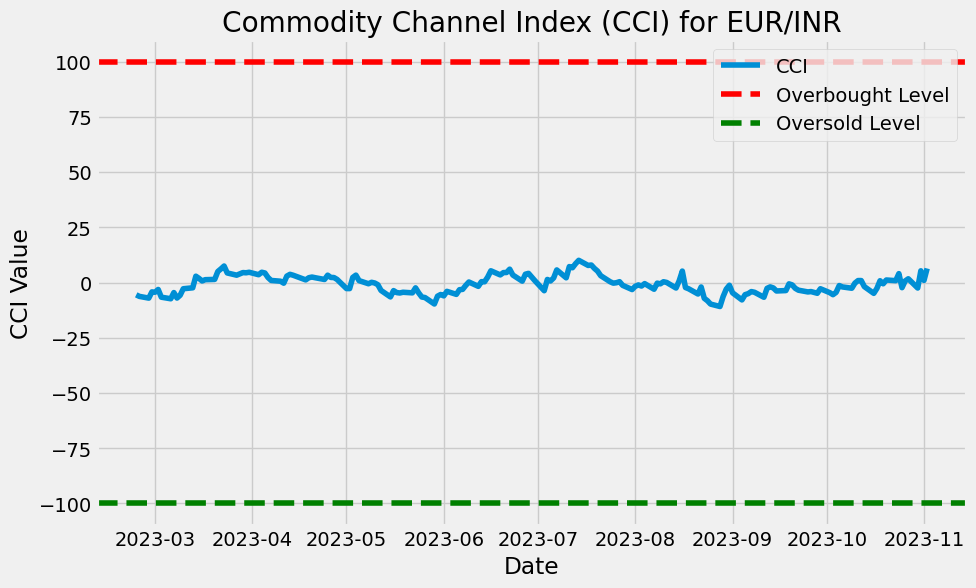

In [49]:
# Plot Commodity Channel Index (CCI)
plt.figure(figsize=(10, 6))
plt.plot(data['CCI'], label='CCI')
plt.axhline(y=100, color='r', linestyle='--', label='Overbought Level')
plt.axhline(y=-100, color='g', linestyle='--', label='Oversold Level')
plt.title('Commodity Channel Index (CCI) for EUR/INR')
plt.xlabel('Date')
plt.ylabel('CCI Value')
plt.legend()
plt.show()

In [50]:
# Initialize a new column for decisions
data['Decision'] = 'Neutral'  # Start with 'Neutral' as the default decision

# Simple decision-making logic
for i in range(len(data)):
    if data['MA_10'][i] > data['MA_20'][i] and data['CCI'][i] > 0:
        data['Decision'][i] = 'Buy'
    elif data['MA_10'][i] < data['MA_20'][i] and data['CCI'][i] < 0:
        data['Decision'][i] = 'Sell'

# Display the buy/sell/neutral cases
print(data['Decision'].value_counts())


Sell       80
Neutral    74
Buy        65
Name: Decision, dtype: int64


<ipython-input-50-57433feec556>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Decision'][i] = 'Sell'
<ipython-input-50-57433feec556>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Decision'][i] = 'Buy'


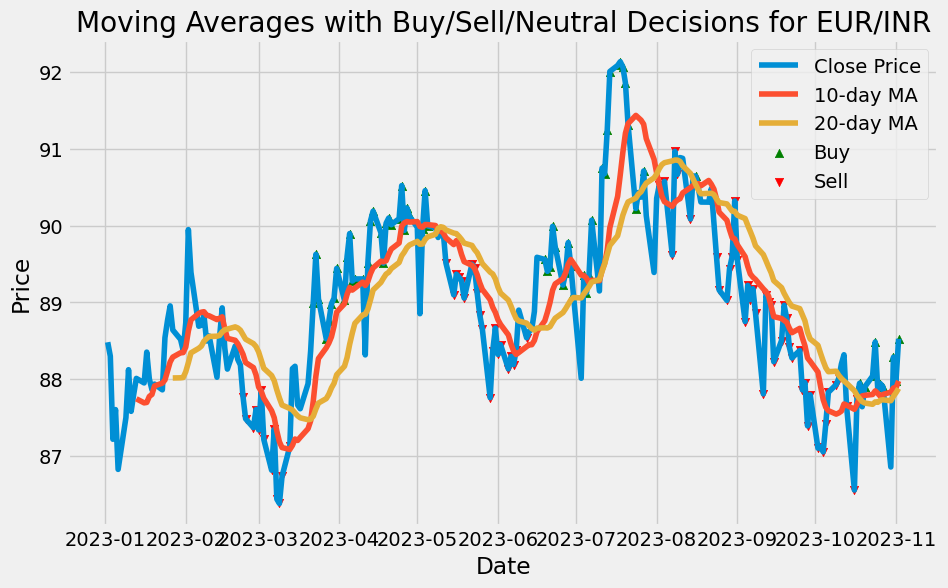

In [51]:
# Plot Moving Averages with Buy/Sell/Neutral decisions
plt.figure(figsize=(10, 6))
plt.plot(data['Close'], label='Close Price')
plt.plot(data['MA_10'], label='10-day MA')
plt.plot(data['MA_20'], label='20-day MA')

# Highlight Buy points
plt.scatter(data[data['Decision'] == 'Buy'].index, data[data['Decision'] == 'Buy']['Close'], color='g', label='Buy', marker='^')

# Highlight Sell points
plt.scatter(data[data['Decision'] == 'Sell'].index, data[data['Decision'] == 'Sell']['Close'], color='r', label='Sell', marker='v')

plt.title('Moving Averages with Buy/Sell/Neutral Decisions for EUR/INR')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [52]:
# Assuming 'data' DataFrame with the added indicators and decisions

# Filter data for Buy, Sell, and Neutral decisions
buy_data = data[data['Decision'] == 'Buy']
sell_data = data[data['Decision'] == 'Sell']
neutral_data = data[data['Decision'] == 'Neutral']

# Concatenate the dataframes
decision_table = pd.concat([buy_data, sell_data, neutral_data])

# Keep only the necessary columns
decision_table = decision_table[['Decision', 'Close']]

# Rename the columns for clarity
decision_table.columns = ['Decision', 'Price']

# Sort the table by date
decision_table = decision_table.sort_index()

# Display the table
print(decision_table)


           Decision      Price
2023-01-02  Neutral  88.482002
2023-01-03  Neutral  88.300003
2023-01-04  Neutral  87.219002
2023-01-05  Neutral  87.605003
2023-01-06  Neutral  86.827003
...             ...        ...
2023-10-27      Buy  87.900002
2023-10-30  Neutral  86.858002
2023-10-31      Buy  88.286003
2023-11-01      Buy  87.983002
2023-11-02      Buy  88.526199

[219 rows x 2 columns]
